In [ ]:
! pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np

jp_morgan = pd.read_csv('JPMorgan_Chase.csv')
jp_morgan

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.434315,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.500584,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,126.698761,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,127.142708,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6585200


In [ ]:
jp_morgan['Date'] = pd.to_datetime(jp_morgan['Date'])
jp_morgan

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.434315,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.500584,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,126.698761,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,127.142708,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6585200


In [ ]:
complete_date_range = pd.date_range(start = '2013-01-01', end = '2023-01-01')
df_dates = pd.DataFrame(complete_date_range, columns=['Date'])
df = pd.merge(df_dates, jp_morgan, on='Date', how='left')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,31413000.0
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,24227700.0
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,24487700.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8827700.0
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6585200.0
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,129.420364,9292500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for column in columns:
    df[column].interpolate(method='linear', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.409776,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06


In [ ]:
df.fillna(method='bfill', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.882111,3.141300e+07
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.409776,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06


In [ ]:
jp_morgan_closing_price = df[['Date','Close']]
jp_morgan_closing_price

,Date,Close
0,2013-01-01,44.660000
1,2013-01-02,44.660000
2,2013-01-03,44.570000
3,2013-01-04,45.360001
4,2013-01-05,45.376667
...,...,...
3648,2022-12-28,132.460007
3649,2022-12-29,133.220001
3650,2022-12-30,134.100006
3651,2022-12-31,134.100006


In [ ]:
jp_morgan_data = jp_morgan_closing_price.rename(columns={'Date': 'ds', 'Close': 'y'})
jp_morgan_data

,ds,y
0,2013-01-01,44.660000
1,2013-01-02,44.660000
2,2013-01-03,44.570000
3,2013-01-04,45.360001
4,2013-01-05,45.376667
...,...,...
3648,2022-12-28,132.460007
3649,2022-12-29,133.220001
3650,2022-12-30,134.100006
3651,2022-12-31,134.100006


In [ ]:
split_index = int(jp_morgan_data.shape[0] * 0.8)
train_data = jp_morgan_data.iloc[:split_index]
test_data = jp_morgan_data.iloc[split_index:]

In [ ]:
train_data

,ds,y
0,2013-01-01,44.660000
1,2013-01-02,44.660000
2,2013-01-03,44.570000
3,2013-01-04,45.360001
4,2013-01-05,45.376667
...,...,...
2917,2020-12-27,125.134996
2918,2020-12-28,125.339996
2919,2020-12-29,125.010002
2920,2020-12-30,125.360001


In [ ]:
test_data

,ds,y
2922,2021-01-01,126.770001
2923,2021-01-02,126.470001
2924,2021-01-03,126.170002
2925,2021-01-04,125.870003
2926,2021-01-05,125.650002
...,...,...
3648,2022-12-28,132.460007
3649,2022-12-29,133.220001
3650,2022-12-30,134.100006
3651,2022-12-31,134.100006


In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(train_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqpiv3alt/fzqetump.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqpiv3alt/qck1c4zz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13656', 'data', 'file=/tmp/tmpqpiv3alt/fzqetump.json', 'init=/tmp/tmpqpiv3alt/qck1c4zz.json', 'output', 'file=/tmp/tmpqpiv3alt/prophet_modelx3qmd5g9/prophet_model-20240118155737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:57:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:57:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = model.make_future_dataframe(periods=len(test_data),freq='D')
future_data

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
3648,2022-12-28
3649,2022-12-29
3650,2022-12-30
3651,2022-12-31


In [ ]:
forecast=model.predict(future_data)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,44.395378,43.524141,59.509178,44.395378,44.395378,7.076757,7.076757,7.076757,1.039777,...,0.014043,0.014043,0.014043,6.022937,6.022937,6.022937,0.0,0.0,0.0,51.472135
1,2013-01-02,44.440676,43.560188,59.445802,44.440676,44.440676,6.958622,6.958622,6.958622,1.039777,...,0.033333,0.033333,0.033333,5.885513,5.885513,5.885513,0.0,0.0,0.0,51.399298
2,2013-01-03,44.485974,42.845470,58.678366,44.485974,44.485974,6.806425,6.806425,6.806425,1.039777,...,0.025547,0.025547,0.025547,5.741102,5.741102,5.741102,0.0,0.0,0.0,51.292399
3,2013-01-04,44.531272,43.348345,59.294602,44.531272,44.531272,6.617554,6.617554,6.617554,1.039777,...,-0.012818,-0.012818,-0.012818,5.590595,5.590595,5.590595,0.0,0.0,0.0,51.148826
4,2013-01-05,44.576570,42.608288,58.941504,44.576570,44.576570,6.458245,6.458245,6.458245,1.039777,...,-0.016517,-0.016517,-0.016517,5.434985,5.434985,5.434985,0.0,0.0,0.0,51.034815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,84.421718,37.453887,148.651888,31.213910,141.932261,7.609876,7.609876,7.609876,1.039777,...,0.033333,0.033333,0.033333,6.536767,6.536767,6.536767,0.0,0.0,0.0,92.031594
3649,2022-12-29,84.397004,37.586938,150.805441,31.047057,142.089058,7.504041,7.504041,7.504041,1.039777,...,0.025547,0.025547,0.025547,6.438718,6.438718,6.438718,0.0,0.0,0.0,91.901045
3650,2022-12-30,84.372290,38.124068,151.489300,30.880204,142.245855,7.358068,7.358068,7.358068,1.039777,...,-0.012818,-0.012818,-0.012818,6.331109,6.331109,6.331109,0.0,0.0,0.0,91.730358
3651,2022-12-31,84.347576,37.252821,149.707703,30.713351,142.402652,7.237563,7.237563,7.237563,1.039777,...,-0.016517,-0.016517,-0.016517,6.214303,6.214303,6.214303,0.0,0.0,0.0,91.585139


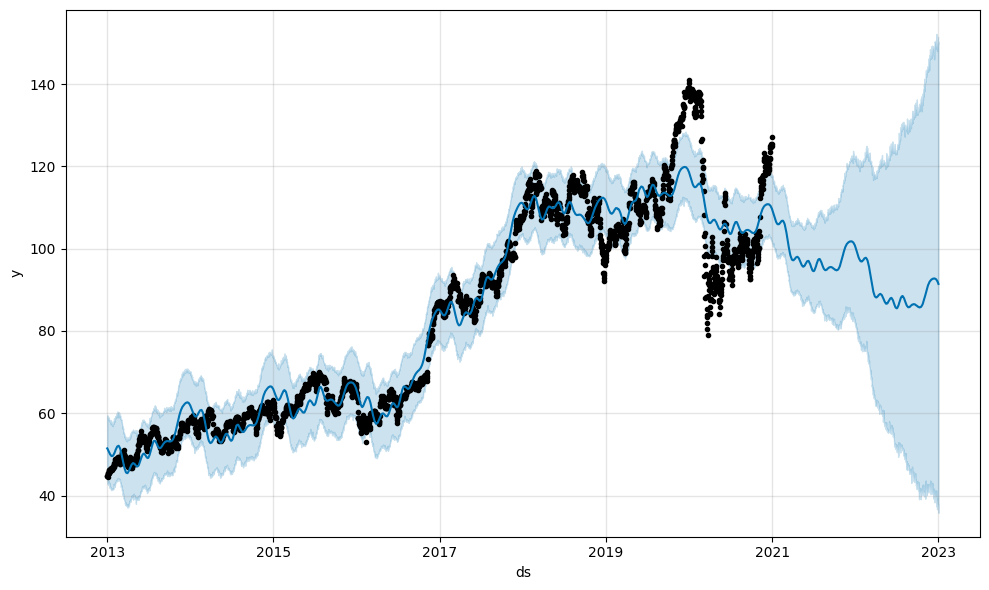

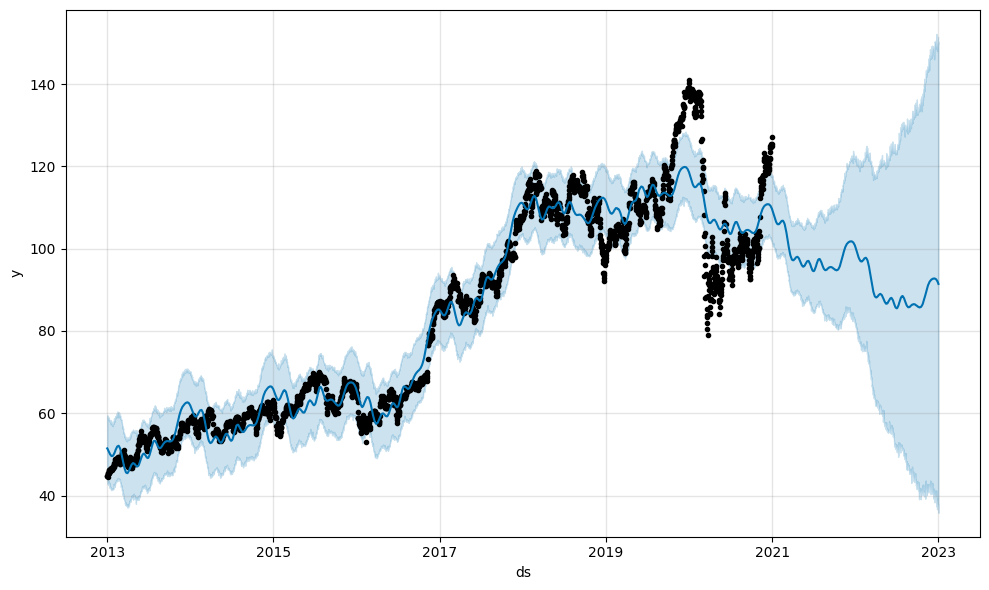

In [ ]:
model.plot(forecast)

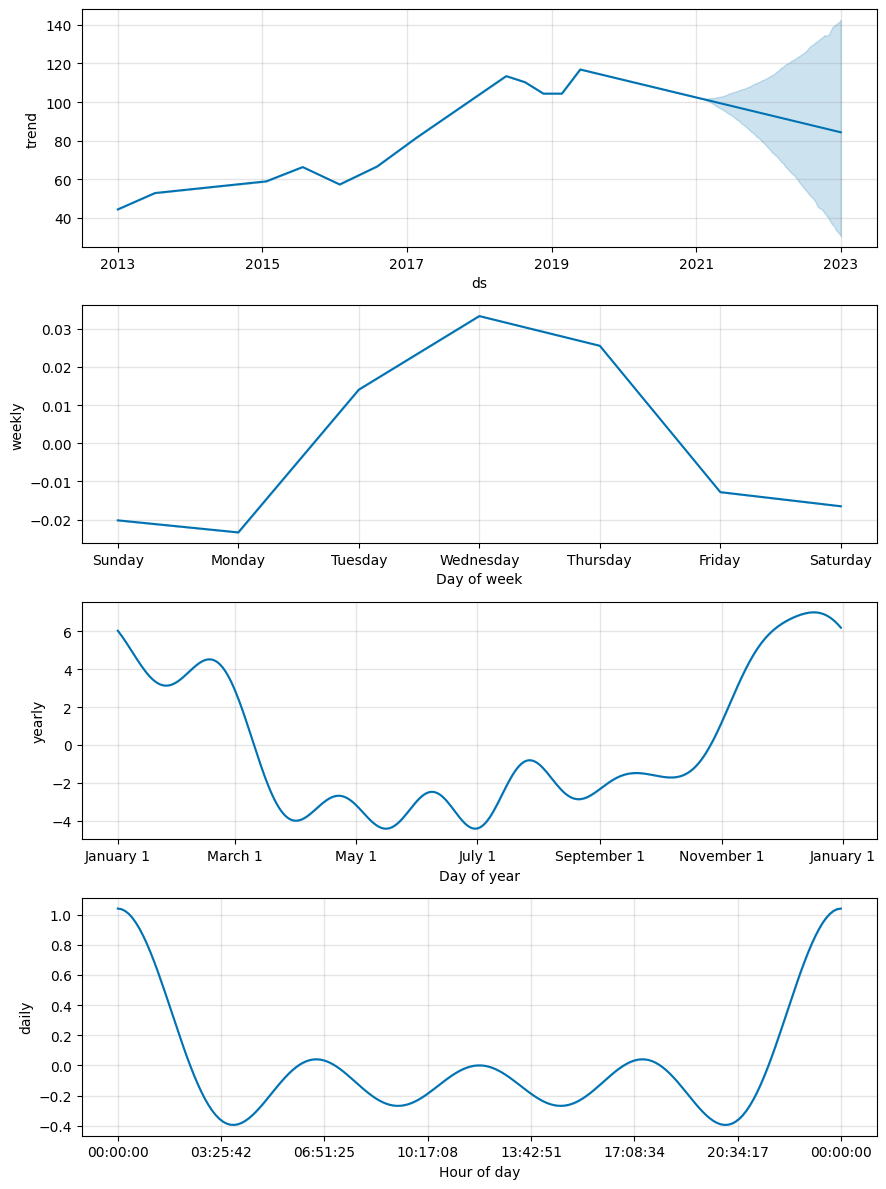

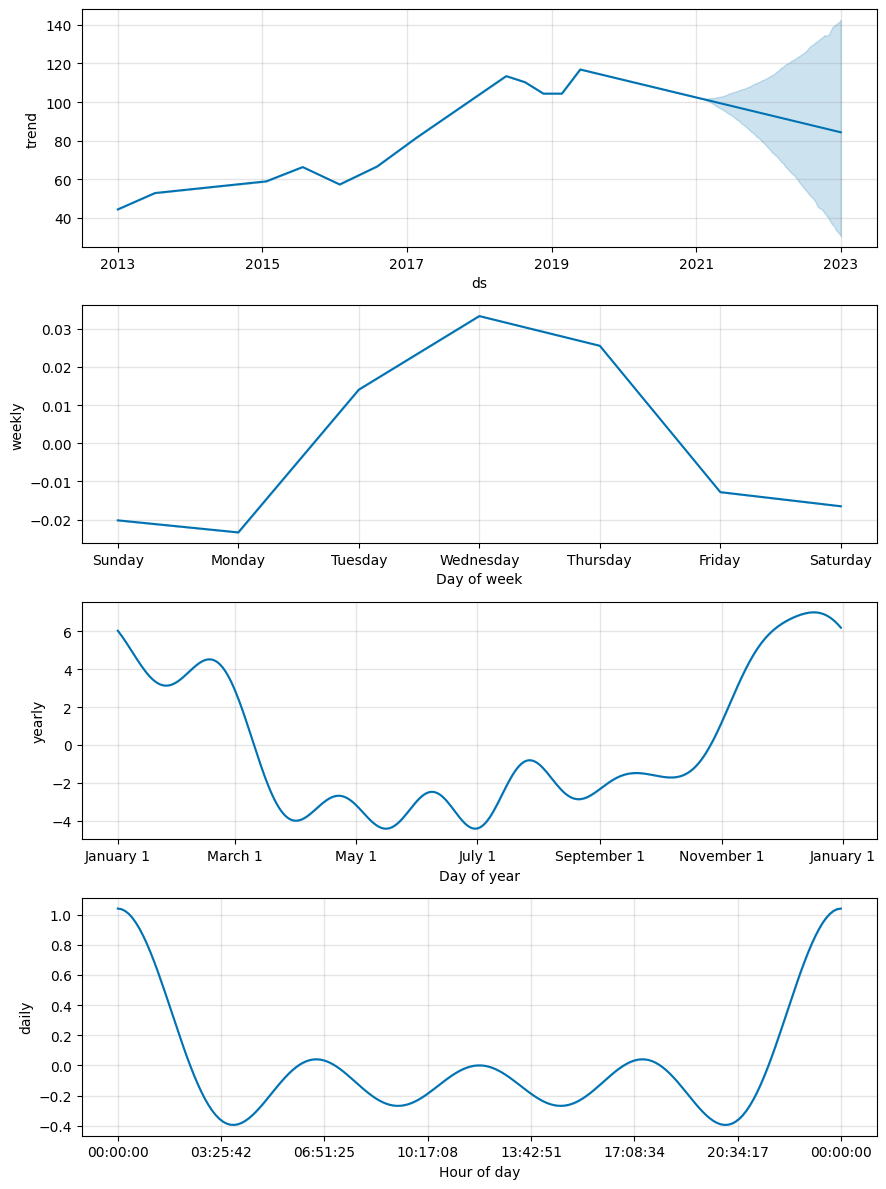

In [ ]:
model.plot_components(forecast)

In [ ]:
df = jp_morgan_data.set_index('ds').join(forecast.set_index('ds'))
df

,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2013-01-01,44.660000,44.395378,43.524141,59.509178,44.395378,44.395378,7.076757,7.076757,7.076757,1.039777,...,0.014043,0.014043,0.014043,6.022937,6.022937,6.022937,0.0,0.0,0.0,51.472135
2013-01-02,44.660000,44.440676,43.560188,59.445802,44.440676,44.440676,6.958622,6.958622,6.958622,1.039777,...,0.033333,0.033333,0.033333,5.885513,5.885513,5.885513,0.0,0.0,0.0,51.399298
2013-01-03,44.570000,44.485974,42.845470,58.678366,44.485974,44.485974,6.806425,6.806425,6.806425,1.039777,...,0.025547,0.025547,0.025547,5.741102,5.741102,5.741102,0.0,0.0,0.0,51.292399
2013-01-04,45.360001,44.531272,43.348345,59.294602,44.531272,44.531272,6.617554,6.617554,6.617554,1.039777,...,-0.012818,-0.012818,-0.012818,5.590595,5.590595,5.590595,0.0,0.0,0.0,51.148826
2013-01-05,45.376667,44.576570,42.608288,58.941504,44.576570,44.576570,6.458245,6.458245,6.458245,1.039777,...,-0.016517,-0.016517,-0.016517,5.434985,5.434985,5.434985,0.0,0.0,0.0,51.034815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,132.460007,84.421718,37.453887,148.651888,31.213910,141.932261,7.609876,7.609876,7.609876,1.039777,...,0.033333,0.033333,0.033333,6.536767,6.536767,6.536767,0.0,0.0,0.0,92.031594
2022-12-29,133.220001,84.397004,37.586938,150.805441,31.047057,142.089058,7.504041,7.504041,7.504041,1.039777,...,0.025547,0.025547,0.025547,6.438718,6.438718,6.438718,0.0,0.0,0.0,91.901045
2022-12-30,134.100006,84.372290,38.124068,151.489300,30.880204,142.245855,7.358068,7.358068,7.358068,1.039777,...,-0.012818,-0.012818,-0.012818,6.331109,6.331109,6.331109,0.0,0.0,0.0,91.730358


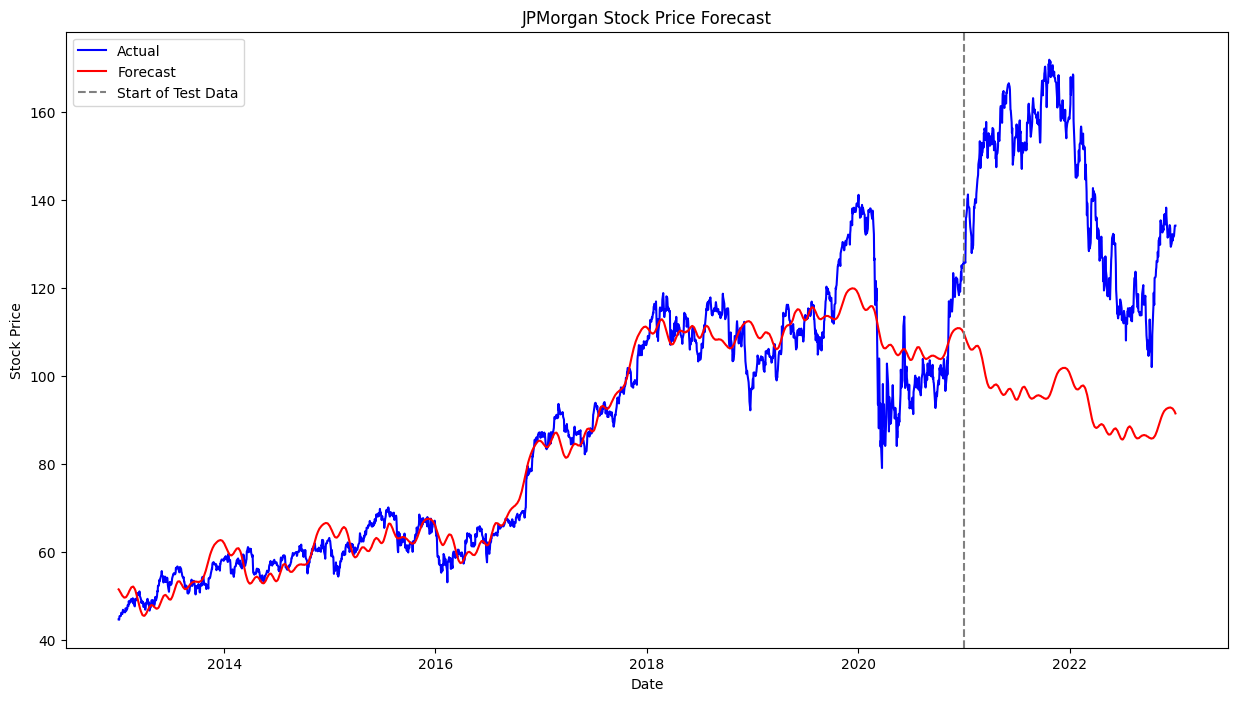

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
plt.plot(df.index, df['y'], label='Actual', color='blue')
plt.plot(df.index, df['yhat'], label='Forecast', color='red')
plt.axvline(x=train_data['ds'].max(), color='gray', linestyle='--', label='Start of Test Data')

plt.title('JPMorgan Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae_train = mean_absolute_error(df[:len(train_data)]['y'], df[:len(train_data)]['yhat'])
mae_test = mean_absolute_error(df[len(train_data):]['y'], df[len(train_data):]['yhat'])


print('The MAE for train is',mae_train)
print('The MAE for test is',mae_test)

The MAE for train is 4.442711393094223
The MAE for test is 47.43788642756408


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse_train = mean_squared_error(df[:len(train_data)]['y'], df[:len(train_data)]['yhat'])
mse_test = mean_squared_error(df[len(train_data):]['y'], df[len(train_data):]['yhat'])

print('The MSE for train is',mse_train)
print('The MSE for test is',mse_test)

The MSE for train is 38.79925972427497
The MSE for test is 2477.4139727302004


In [ ]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('The RMSE for train is', rmse_train)
print('The RMSE for test is', rmse_test)


The RMSE for train is 6.228905178622883
The RMSE for test is 49.773627281223945
